# OPAL experiment tracking example

By Carl A. Lindstrøm (University of Oslo), 2 Jun 2023

### Import OPAL framework

In [1]:
import sys
sys.path.append('../')
from opal import *

### Define the input beams

In [2]:
# define witness bunch
witness = SourceTrapezoid()
witness.charge = -2.4e-9 # [C]
witness.energy = 10e9 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 40e-6 # [m]
witness.current_head = 3e3 # [A]
witness.z_offset = -60e-6 # [m]
witness.emit_nx, witness.emit_ny = 1e-6, 1e-6 # [m rad]
witness.beta_x, witness.beta_y = 40e-3, 10e-3 # [m]
witness.num_particles = 20000
witness.x_offset, witness.y_offset = 10e-6, 0e-6 # [m]

# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = witness.energy # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 100e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 50e-3, 50e-3 # [m]
driver.num_particles = 20000

### Define the experimental setup

In [3]:
# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = witness.beta_x # [m]
bds.beta_y = witness.beta_y # [m]

# define stage
stage = StageNonlinear1d()
stage.driver_source = driver
stage.length = 1.17 # [m]
stage.plasma_density = 1e22 # [m^-3]
#stage.addDriverToBeam = True

# define spectrometer
spectrometer = SpectrometerFACET2Basic()
spectrometer.dipole_field = 0.5 # [T]
spectrometer.obj_plane = 0.00 # [m]
spectrometer.mag_x = -8 
spectrometer.img_energy = 13e9 # [eV]
spectrometer.set_imaging()

# define experiment
experiment = Experiment(witness, bds, stage, spectrometer)

### Perform linac tracking

In [4]:
# perform experiment tracking
beam = experiment.run("experiment_example")

Tracking element #1 (s = 0.0 m, -2.40 nC, 10.0 GeV, SourceTrapezoid, stage 0)
Tracking element #2 (s = 0.0 m, -2.40 nC, 10.0 GeV, BeamDeliverySystemBasic, stage 0)
Tracking element #3 (s = 1.2 m, -2.40 nC, 12.6 GeV, StageNonlinear1d, stage 1)
Tracking element #4 (s = 3.1 m, -2.40 nC, 12.6 GeV, DriftBasic, stage 1)
Tracking element #5 (s = 4.1 m, -2.40 nC, 12.6 GeV, QuadrupoleBasic, stage 1)
Tracking element #6 (s = 5.3 m, -2.40 nC, 12.6 GeV, DriftBasic, stage 1)
Tracking element #7 (s = 6.3 m, -2.40 nC, 12.6 GeV, QuadrupoleBasic, stage 1)
Tracking element #8 (s = 7.5 m, -2.40 nC, 12.6 GeV, DriftBasic, stage 1)
Tracking element #9 (s = 8.5 m, -2.40 nC, 12.6 GeV, QuadrupoleBasic, stage 1)
Tracking element #10 (s = 12.0 m, -2.40 nC, 12.6 GeV, DriftBasic, stage 1)
Tracking element #11 (s = 13.0 m, -2.40 nC, 12.6 GeV, DipoleSpectrometerBasic, stage 1)
Tracking element #12 (s = 21.8 m, -2.40 nC, 12.6 GeV, DriftBasic, stage 1)


### Plot the wakefield

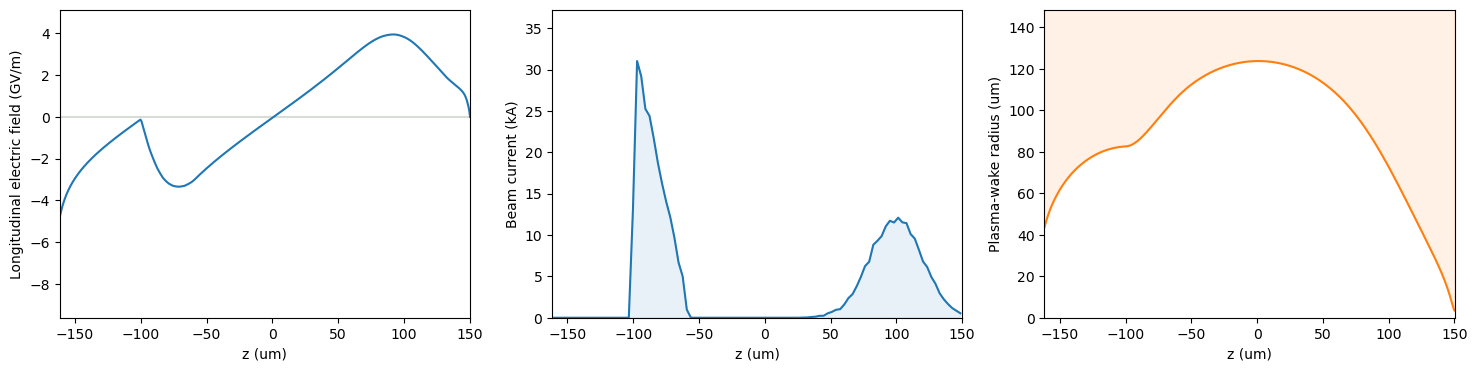

In [5]:
# plot wakefield
stage.plot_wakefield(witness.track())

### Plot the spectrometer screen

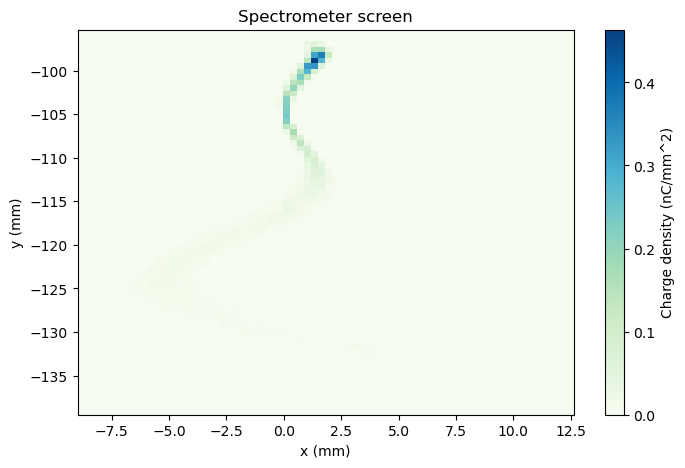

In [6]:
experiment.plot_spectrometer_screen()

### Plot longitudinal phase space

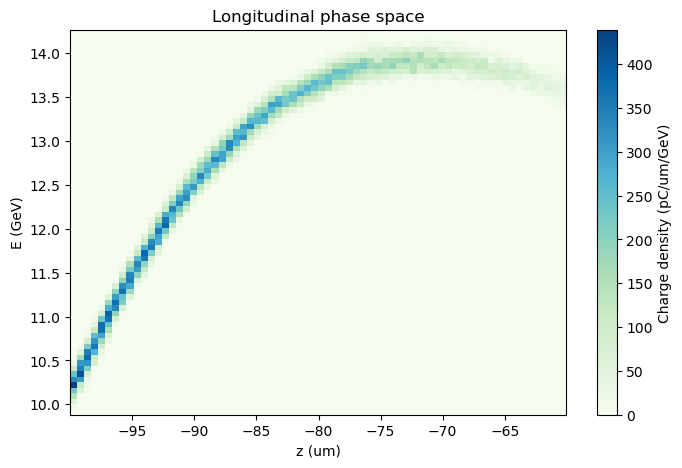

In [7]:
# plot the longitudinal phase space
beam.plot_lps()